# Predicting the occurrence of food in TV shows for advertisement purposes

## Introduction

I tried to classify items from scenes in several TV shows for commercial interest. When a food appears in a TV scene, including a food-related advertisement can help elevate sales. The purpose of this project is to identify each time there is food occurrence in the TV scenes. The dataset has 16568 sample data consisting of 1606 feature variables and 1 target variables. This project focuses on classifying 'h_food_str.' We used six machine learning models on the given dataset to classify the item.

## Importing Libraries and data

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter('ignore')

df1 = pd.read_csv("tv_scenes_object.csv")
df1

,show_name,time_offset,r_abies,r_abyssinian,r_accessories,r_accipiter,r_acorn,r_adapter,r_adorable,r_adventure,...,r_yak,r_yard,r_yew,r_zebra,r_zebra_crossing,r_zoo,h_alcohol_str,h_food_str,h_hot_drink_str,h_phone_str
0,fresh_meat,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.540910,0.0,0.0,0.0,0,0,0,0
1,fresh_meat,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.515789,0.0,0.0,0.0,0,0,0,0
2,fresh_meat,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.527750,0.0,0.0,0.0,0,0,0,0
3,fresh_meat,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.534361,0.0,0.0,0.0,0,0,0,0
4,fresh_meat,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.529979,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16563,the_inbetweeners,1307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.000000,0.0,0.0,0.0,0,0,0,0
16564,the_inbetweeners,1308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.000000,0.0,0.0,0.0,0,0,0,0
16565,the_inbetweeners,1309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.000000,0.0,0.0,0.0,0,0,0,0
16566,the_inbetweeners,1310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.000000,0.0,0.0,0.0,0,0,0,0


## Exploration of Data, Data Cleaning, and Data Processing

### Data Exploration

Since classifying predicting the variable 'h_food_str' is the concentration of this project, all the other target variables will be dropped.

In [2]:
df2 = df1.drop(['h_alcohol_str','h_hot_drink_str','h_phone_str'], axis = 'columns')

The feature variables ranges from 0 to 1, while the predicted variables is a categorical has value 0 or 1.

In [3]:
df2.describe()

,time_offset,r_abies,r_abyssinian,r_accessories,r_accipiter,r_acorn,r_adapter,r_adorable,r_adventure,r_aerial_view,...,r_wrist,r_x_ray,r_yacht,r_yak,r_yard,r_yew,r_zebra,r_zebra_crossing,r_zoo,h_food_str
count,16568.000000,16568.000000,16568.000000,16568.000000,16568.000000,16568.000000,16568.000000,16568.000000,16568.000000,16568.000000,...,16568.000000,16568.000000,16568.000000,16568.0,16568.000000,16568.000000,16568.000000,16568.000000,16568.000000,16568.000000
mean,1154.162723,0.000338,0.000063,0.016379,0.000036,0.000032,0.000479,0.002098,0.000050,0.001141,...,0.000245,0.000290,0.000034,0.0,0.001586,0.006647,0.000078,0.000083,0.000105,0.088363
std,769.734098,0.013128,0.005775,0.092024,0.004661,0.004112,0.017332,0.034430,0.006475,0.028809,...,0.013028,0.014634,0.004335,0.0,0.028863,0.061150,0.007127,0.007720,0.007856,0.283831
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,518.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1036.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1724.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2884.000000,0.516965,0.527265,0.837948,0.599949,0.529311,0.847798,0.861480,0.833427,0.971708,...,0.913207,0.990169,0.557965,0.0,0.638517,0.939912,0.663115,0.817520,0.657645,1.000000


### Data Cleaning

The code output below shows no outliers and no null values demonstrated by the empty lists printed from the code below. However, we can find variables that have only constant values. In this case, it only consists of zeros. Therefore we eliminate those variables as they will not contribute anything to the predicted variable.

In [4]:
# Checking Outliers
max_of_columns = df2.max()[2:]
print(max_of_columns[max_of_columns > 1])
min_of_columns = df2.min()[2:]
print(min_of_columns[min_of_columns < 0])

# Does null exist in the dataset
null = df2.isna().any(axis=1)
print(null[null == True])

# Check non-constant only variables
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(df2.iloc[:,1:])
print(sum(sel.get_support()))

Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: bool)
1441


In [5]:
df3 = df2[df2.iloc[:,1:].columns[sel.get_support()]]

In [6]:
df3

,time_offset,r_abies,r_abyssinian,r_accessories,r_accipiter,r_acorn,r_adapter,r_adorable,r_adventure,r_aerial_view,...,r_worship,r_wrist,r_x_ray,r_yacht,r_yard,r_yew,r_zebra,r_zebra_crossing,r_zoo,h_food_str
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.573312,0.0,0.0,0.0,0.0,0.540910,0.0,0.0,0.0,0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.593089,0.0,0.0,0.0,0.0,0.515789,0.0,0.0,0.0,0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.665469,0.0,0.0,0.0,0.0,0.527750,0.0,0.0,0.0,0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.550029,0.0,0.0,0.0,0.0,0.534361,0.0,0.0,0.0,0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.554881,0.0,0.0,0.0,0.0,0.529979,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16563,1307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
16564,1308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
16565,1309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
16566,1310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0


### Data Processing

#### Standardization of data

We standardized the feature variables so that they have equal contribution to the predicted variable.

In [7]:
# Normalize variables
from sklearn.preprocessing import StandardScaler

df4 = StandardScaler().fit_transform(df3.iloc[:,1:-1])
np.mean(df4),np.std(df4)

(-4.929408722069142e-19, 1.000000000000002)

In [8]:
df4 = pd.DataFrame(df3, columns=df3.iloc[:,1:-1].columns)

#### Correlation of Data

Next, we check the correlation of the independent variable to the target variable. We will eliminate the low-correlated variables since they will not significantly contribute to our model prediction. Additionally, we can save computation costs by doing this.

In [9]:
# Check the correlation of features to the target variable
target_corr = df4.corrwith(df2['h_food_str'])
target_corr.sort_values(ascending=False)

r_meal         0.365159
r_dinner       0.358913
r_supper       0.358912
r_cafeteria    0.347461
r_food         0.339215
                 ...   
r_poster      -0.050311
r_urban       -0.050545
r_city        -0.051546
r_downtown    -0.053447
r_car         -0.053807
Length: 1439, dtype: float64

In [10]:
# View the independent variables that have decent correlation to the target variable
target_corr[abs(target_corr) >= 0.01]

r_accessories            0.013681
r_adorable               0.015280
r_aerial_view           -0.012330
r_african_grey_parrot    0.024955
r_aircraft              -0.010599
                           ...   
r_woodpecker             0.011025
r_word                  -0.029521
r_worker                 0.010613
r_working_out           -0.027454
r_yew                   -0.031981
Length: 464, dtype: float64

In [11]:
# Eliminate the low correlated and features to build the model
x = df4[target_corr[abs(target_corr) >= 0.01].index.values.tolist()]
y = df2.iloc[:,-1]

#### Data Balancing

To ensure that our observation of the efficiency of the model is not biased, we should do data balancing. This is because a severely imbalanced data can acquire a high accuracy without training an efficient model.

In this dataset, we found that it is severely imbalanced. To overcome this issue, we used oversampling from the function SMOTE. The advantage of SMOTE is that we are not generating duplicates, but rather creating synthetic data points that are slightly different from the original data points.

In [12]:
from collections import Counter
Counter(y)

Counter({0: 15104, 1: 1464})

In [13]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)
Counter(y)

Counter({0: 15104, 1: 15104})

#### Principal Component Analysis (PCA)

The next step used is PCA. PCA is useful when we are dealing with a dataset that have a large number of features. After some data cleaning and data processing, the dimension of our dataset is (30208, 464). Using large number of features to predict a target variable can be computationally expensive. Therefore, we introduce PCA to reduce the high dimensionality of the data.

In [14]:
len(x),len(x.columns)

(30208, 464)

To determine the number of components we will be transforming to, we looked at their contribution from the explained variance.

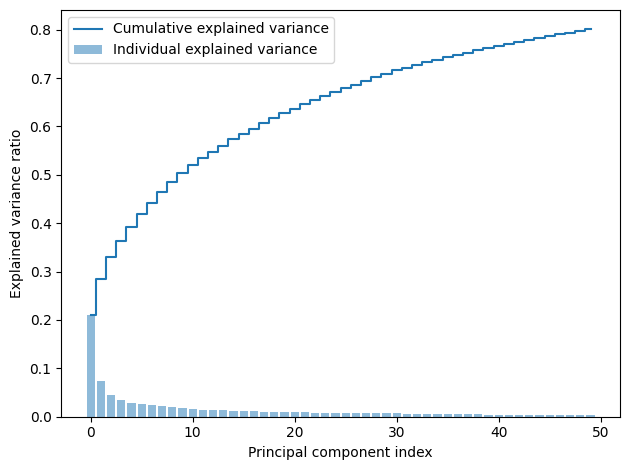

In [30]:
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt

# We transform to lower dimension size but still retain 80% of the cumulative explained variance
pca = PCA(n_components=0.8)
pca.fit_transform(x)

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

To achieve more than 80% explained variance, we can transform the dimension size into 49 components. Originally, we have 464 feature variables. Therefore we save a lot of computational cost while still retaining a high efficiency.

In [16]:
pca_modified = PCA(n_components = 49)
x_pca = pca_modified.fit_transform(x)
x_pca

array([[-0.36852488, -0.0136552 , -0.07314821, ...,  0.15781556,
        -0.145153  , -0.0932875 ],
       [-0.34909498, -0.01855939, -0.05502897, ...,  0.08979931,
        -0.10233217, -0.17118139],
       [-0.34175333, -0.03421653, -0.05114144, ...,  0.06615636,
        -0.12934228, -0.14698219],
       ...,
       [ 2.07952327, -0.26663615, -0.82607756, ...,  0.07843258,
        -0.06790609, -0.03806694],
       [-0.30895736, -0.06458912, -0.05501248, ...,  0.00623037,
        -0.00577203, -0.00994738],
       [-0.30895736, -0.06458912, -0.05501248, ...,  0.00623037,
        -0.00577203, -0.00994738]])

## Model Building and Evaluation

The 6 machine learning models that were used to classify the variable 'h_food_str' are:
1. Basic Logistic Regression
2. Logistic Regression with Ridge Regression
3. Gaussian Naive Bayes
4. Linear Support Vector Machine (SVM)
5. Random Forest
6. Basic Neural Network

To train the model, the dataset was split into 80% training dataset and 20% test dataset.

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_pca,y,test_size=0.2,random_state=42)

To measure the effectiveness of the models, we used several metrics:
1. Precision which tells us the proportion of positive predictions that are correct.
2. Recall which tells us the proportion of the positive cases the classifier correctly predicted, over all the positive cases in the data
3. F1 score is a measure combining both precision and recall. A good F1 score means that we have a balanced precision and recall score.
4. ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.
5. AUC stands for "Area under the ROC Curve." The higher the AUC the better.


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

model_evaluation = {}

def metrics(y_test, y_pred):
    return accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred), accuracy_score(y_test, y_pred)

def buildModels(X_train, X_test, y_train, y_test):
    # Logistic Regression
    LR= LogisticRegression()
    LR.fit(X_train,y_train)
    y_prob = LR.predict_proba(X_test)[:,1]
    y_pred = np.where(y_prob > 0.5, 1, 0)
    model_evaluation['Logistic Regression'] = metrics(y_test, y_pred)

    # Ridge Logistic Regression
    LR_ridge= LogisticRegression(penalty='l2')
    LR_ridge.fit(X_train,y_train)
    y_prob = LR_ridge.predict_proba(X_test)[:,1]
    y_pred = np.where(y_prob > 0.5, 1, 0)
    model_evaluation['Ridge Logistic Regression'] = metrics(y_test, y_pred)

    # Gaussian Naive Bayes
    model_naive = GaussianNB()
    model_naive.fit(X_train, y_train)
    y_prob = model_naive.predict_proba(X_test)[:,1] 
    y_pred = np.where(y_prob > 0.5, 1, 0)
    model_evaluation['Gaussian Naive Bayes'] = metrics(y_test, y_pred)

    # Support Vector Machine
    model_svm = svm.SVC()
    model_svm.fit(X_train, y_train)
    y_pred = model_svm.predict(X_test)
    model_evaluation['SVM'] = metrics(y_test, y_pred)

    # Random Forest
    model_RR=RandomForestClassifier()
    model_RR.fit(X_train,y_train)
    y_prob = model_RR.predict_proba(X_test)[:,1]
    y_pred = np.where(y_prob > 0.5, 1, 0)
    model_evaluation['Random Forest'] = metrics(y_test, y_pred)

    # Neural Network
    mlp = MLPClassifier()
    mlp.fit(X_train,y_train)
    y_prob = mlp.predict_proba(X_test)[:,1]
    y_pred = np.where(y_prob > 0.5, 1, 0)
    model_evaluation['Neural Network'] = metrics(y_test, y_pred)

buildModels(x_train, x_test, y_train, y_test)

In [19]:
table = pd.DataFrame.from_dict(model_evaluation, orient='index',
                       columns=['accuracy', 'precision', 'recall', 'f1 score'])
table

,accuracy,precision,recall,f1 score
Logistic Regression,0.750910,0.806063,0.720624,0.750910
Ridge Logistic Regression,0.750910,0.806063,0.720624,0.750910
Gaussian Naive Bayes,0.659881,0.607692,0.717293,0.659881
SVM,0.801887,0.866064,0.778866,0.801887
Random Forest,0.862297,0.928201,0.848341,0.862297
Neural Network,0.835485,0.899396,0.818082,0.835485


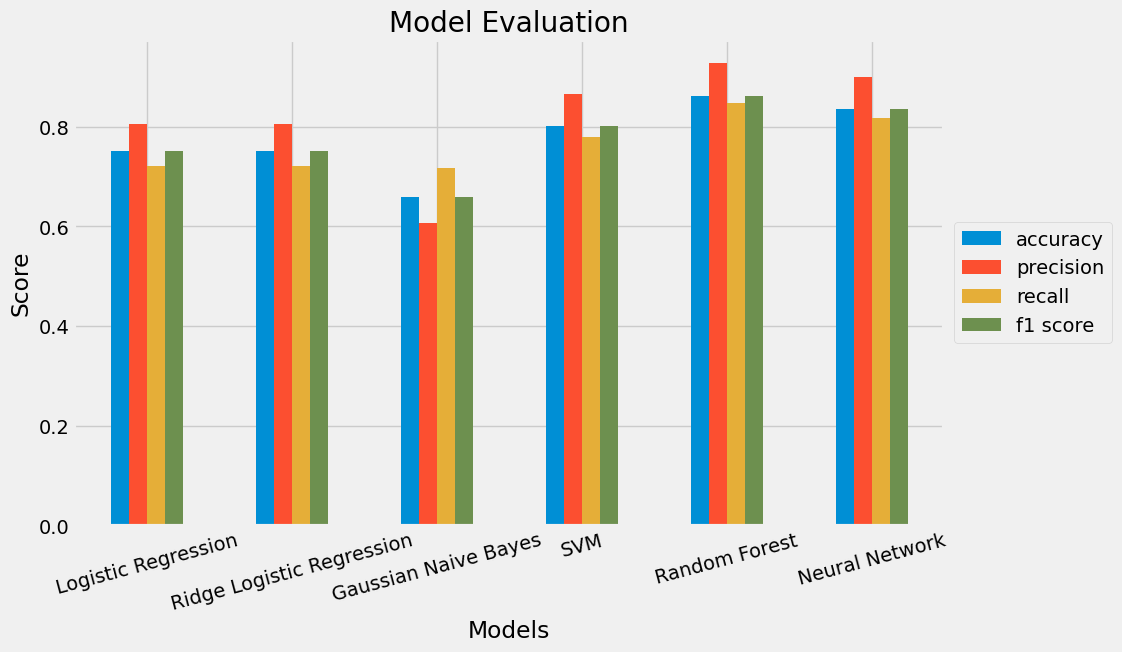

In [41]:
matplotlib.style.use('fivethirtyeight')
table.plot(kind='bar', title='Model Evaluation',
           ylabel='Score', xlabel='Models', figsize=(10, 6), 
           rot=15).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## Conclusion

Of all the Models, Random Forest was the best model for all the metrics used for the model efficiency measurement. This implies that the dataset used is more non-linear than it is linear. The model can successfully classify the item labeled food with a recall of 87%. A recall is the proportion of correct food classification that we can predict from the total that food appears in the TV show. Therefore, 87% of the time, when food appears in a TV show, we can advertise a food brand to increase sales. The model also achieved a precision of 87%. This means that from all of the predicted classifications of food, 87% of them were correct. The model has several other metrics to consider, but the most important ones are precision and recall since they can translate into the business context. Overall, random forest is an excellent model that can accurately classify the variable 'h_food_str.'

## What I would have done to cut corners

If we look at the table below, we can see that the item food has a high occurrence when the show name includes words that closely relate to food. From the table below, the shows that contain food-related titles have 83.40% of all food occurrences from the 10 TV shows. Assume the AWS Rekognition that provides the data requires payment for each processed file instead of selling a subscription where we can use the tool as much as we want in a time. Since there are fewer occurrences of food in the titles of TV show that is not closely related to food, we could consider not analyzing those TV shows. This method can save money and labor. However, note that we need more TV shows as samples to prove that TV show titles will affect the classification.

In [21]:
a = pd.DataFrame(df1.groupby('show_name').sum()['h_food_str'])
a['%'] = 100 * a['h_food_str'] / a['h_food_str'].sum()
a

,h_food_str,%
show_name,,
fresh_meat,850,58.060109
friday_night_dinner,371,25.341530
hollyoaks,22,1.502732
made_in_chelsea,160,10.928962
made_in_chelsea_la,52,3.551913
my_mad_fat_diary,0,0.000000
peep_show,0,0.000000
the_inbetweeners,9,0.614754
